In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [4]:
df=pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
X=df.drop(columns=['Strength'])
Y=df.iloc[:,-1]

In [13]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
Y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
#applying regression without any transformation
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
r2_score(Y_test,Y_pred)

0.6275531792314848

In [20]:
lr=LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))

np.float64(0.4609940491662864)

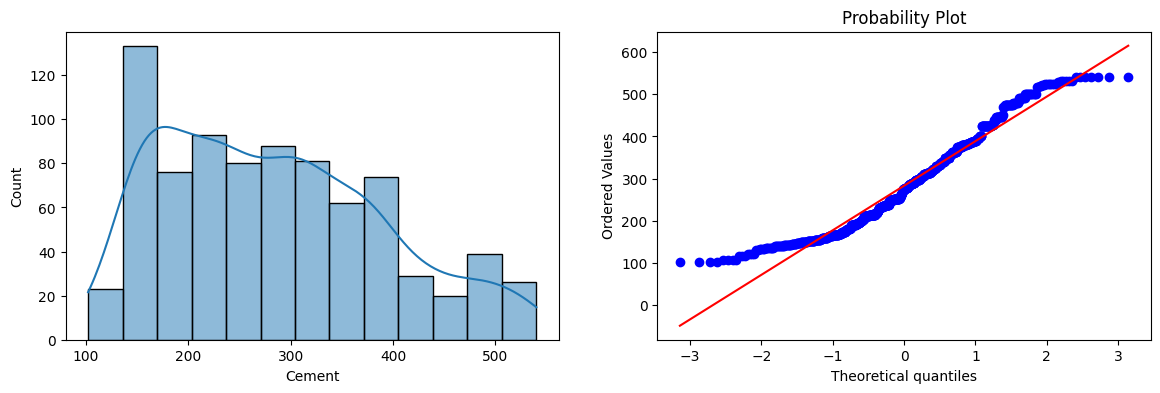

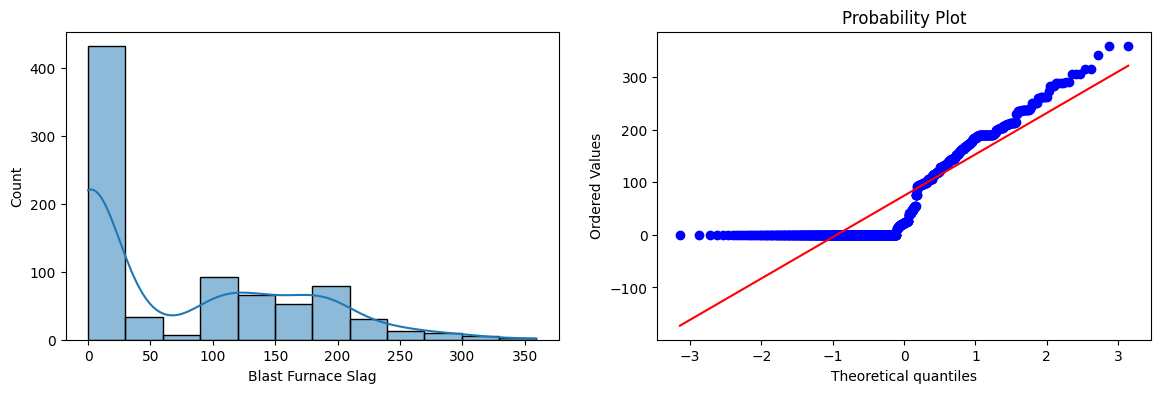

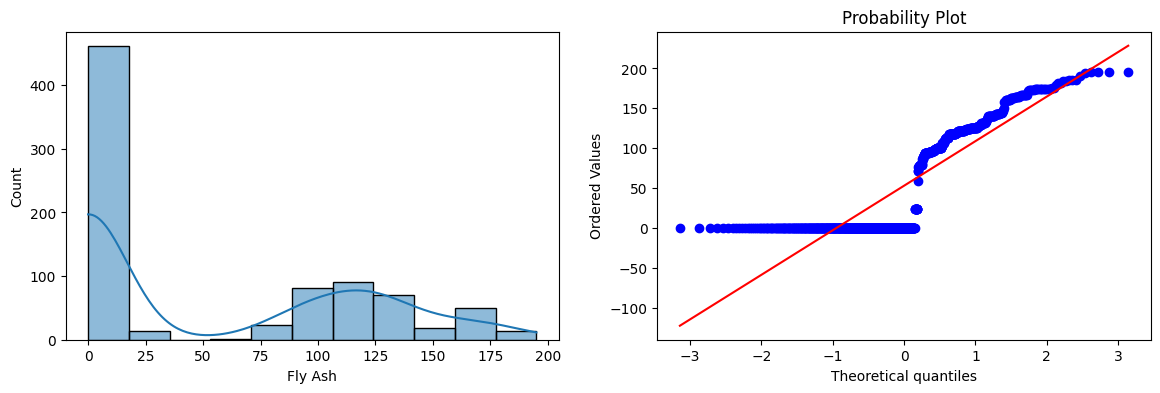

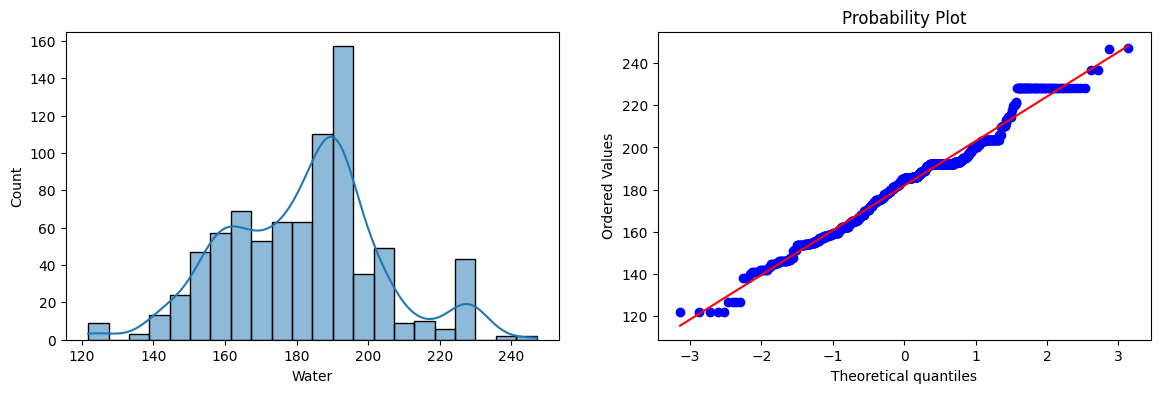

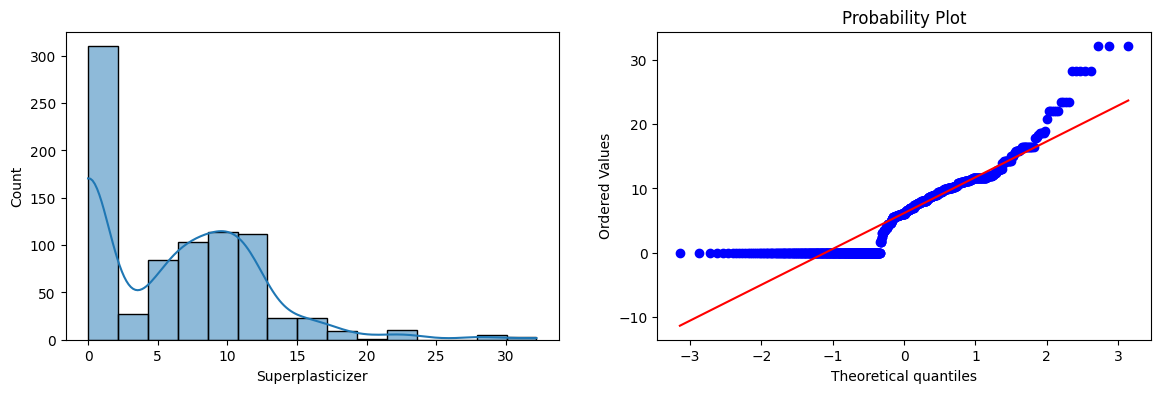

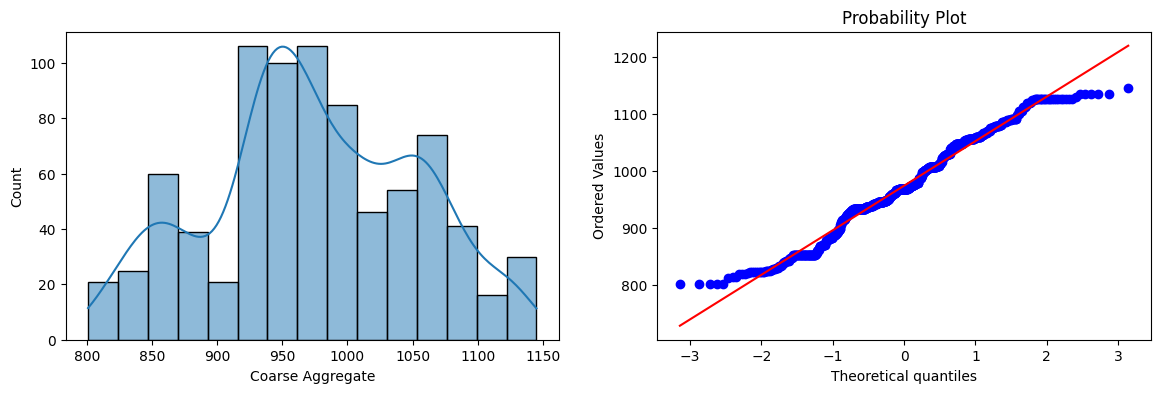

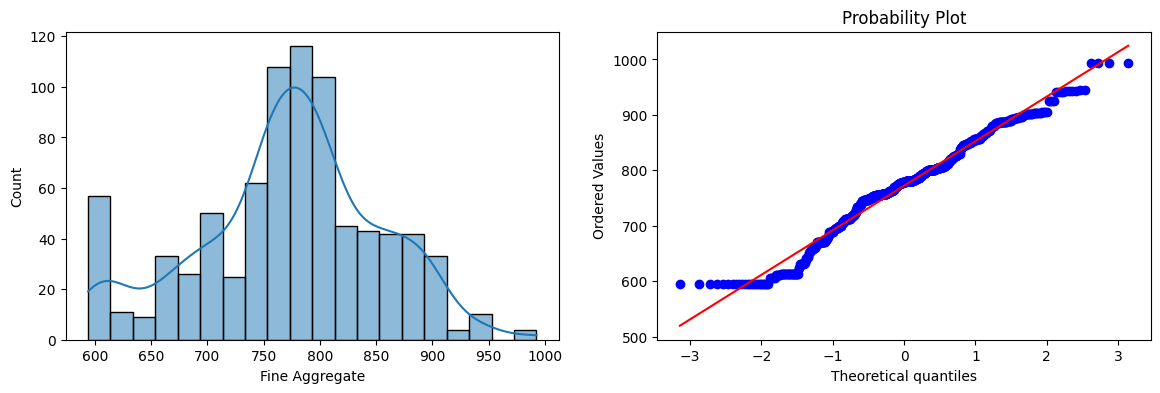

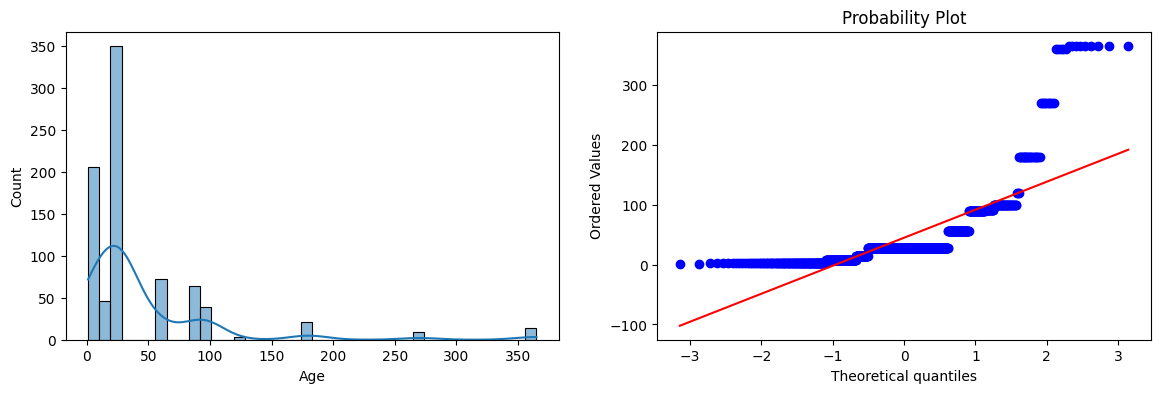

In [21]:
# plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_trian[col],kde=True)
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.show()

In [34]:
# apply box-cox transform
pt=PowerTransformer(method='box-cox')
X_train_transformed=pd.DataFrame(pt.fit_transform(X_train+0.00001))
X_test_transformed=pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [35]:
#Applying linear regression on transformed data
lr=LinearRegression()
lr.fit(X_train_transformed,Y_train)
Y_pred2=lr.predict(X_test_transformed)
r2_score(Y_test,Y_pred2)

0.8054599366864301

In [36]:
#using cross validation score
pt=PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(X+0.00001)
lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

np.float64(0.6668489654022178)

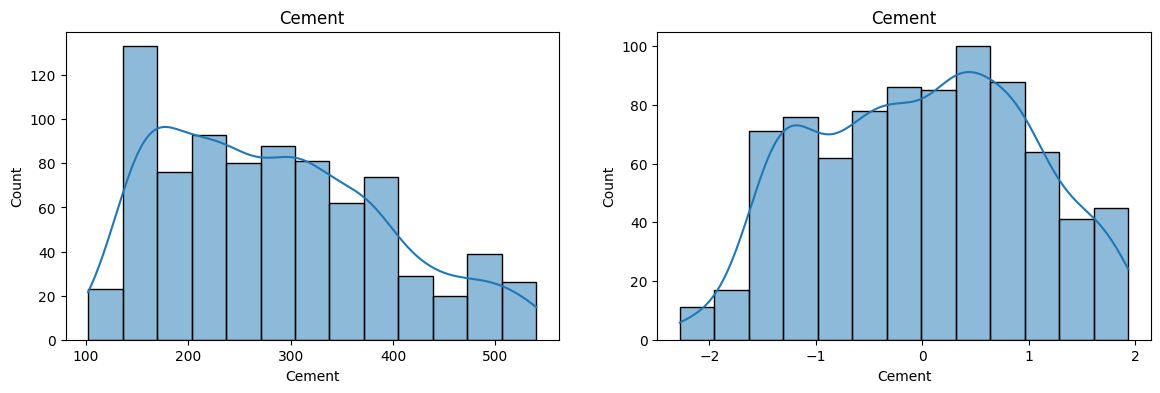

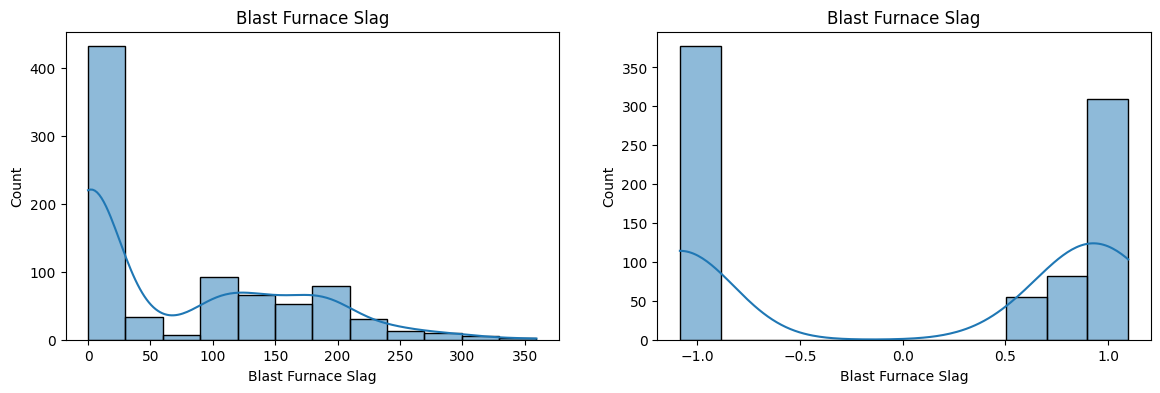

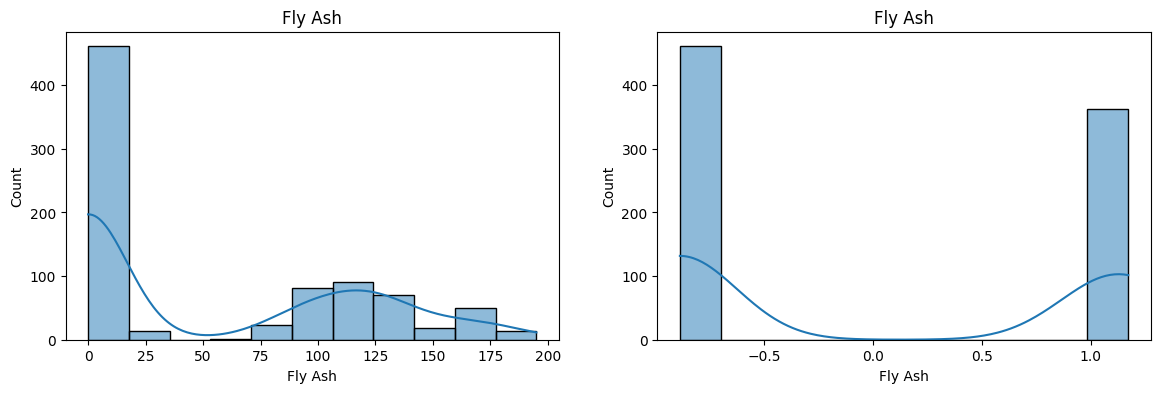

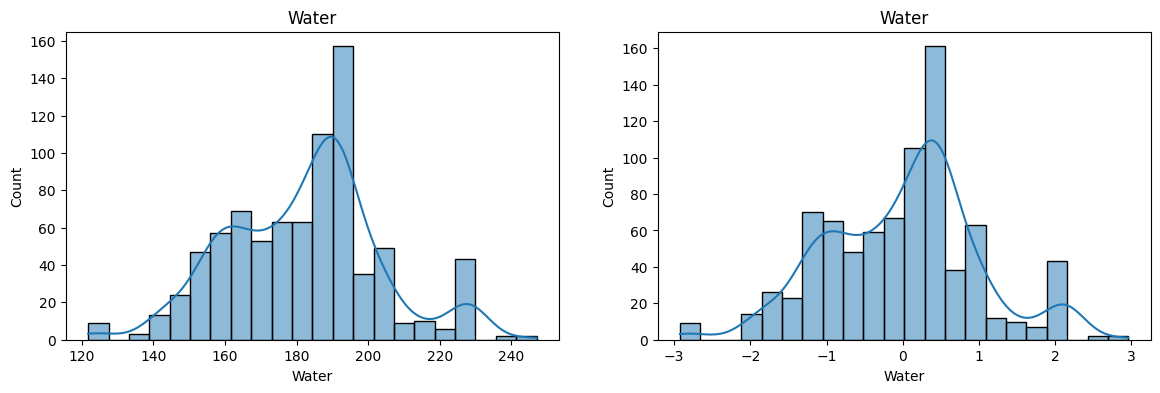

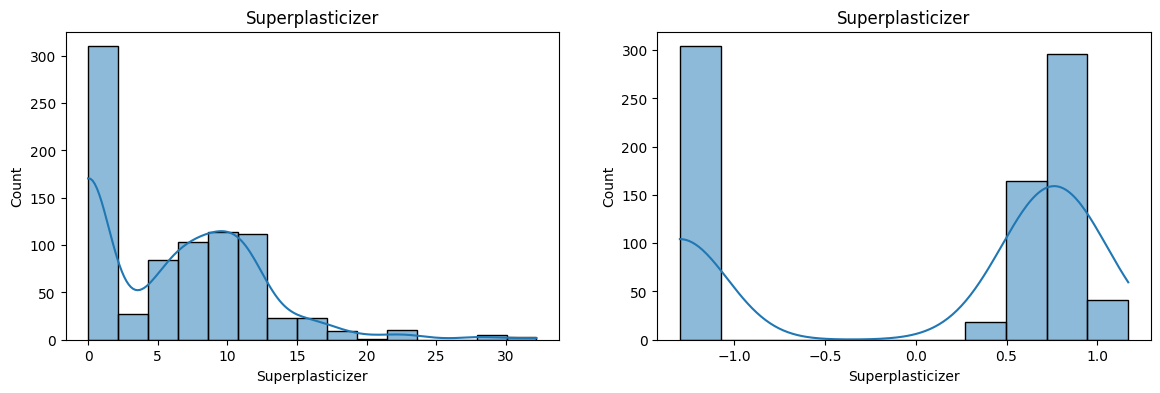

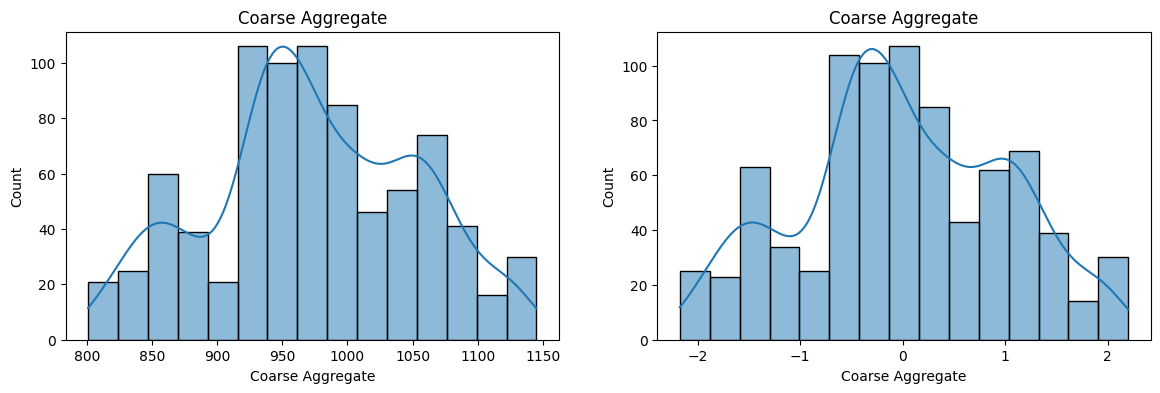

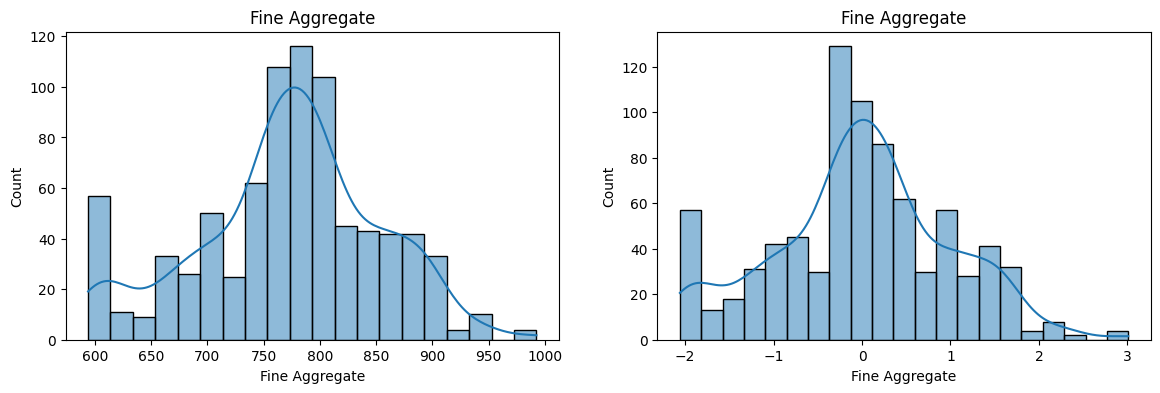

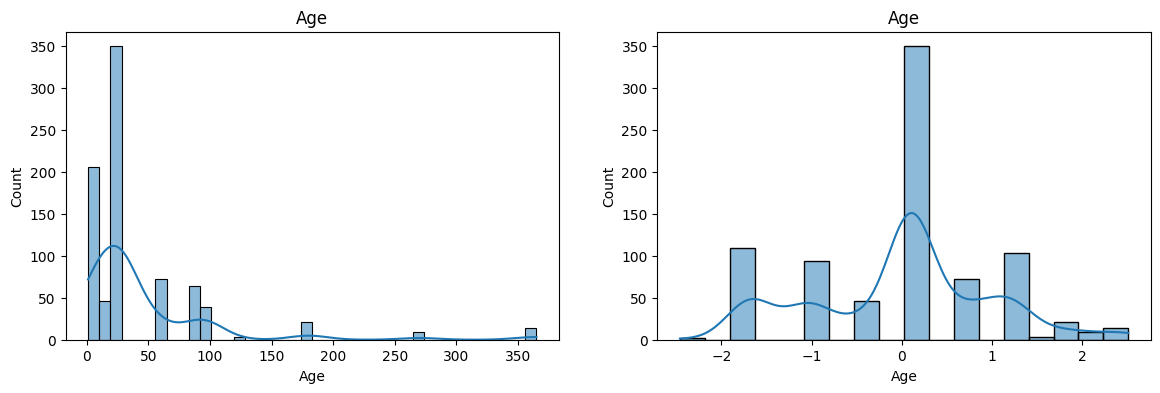

In [39]:
#Before and after comparision for box-cox plot
X_train_transformed.columns=X_train.columns
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)
    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)
    plt.show()

In [46]:
pt1=PowerTransformer()
X_train_transformed2=pd.DataFrame(pt1.fit_transform(X_train))
X_test_transformed2=pt1.transform(X_test)
lr=LinearRegression()
lr.fit(X_train_transformed2,Y_train)
Y_pred3=lr.predict(X_test_transformed2)
print(r2_score(Y_test,Y_pred3))
pd.DataFrame({'cols':X_train.columns,'yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906511066099


,cols,yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [47]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,Y,scoring='r2'))

np.float64(0.6834625126992433)

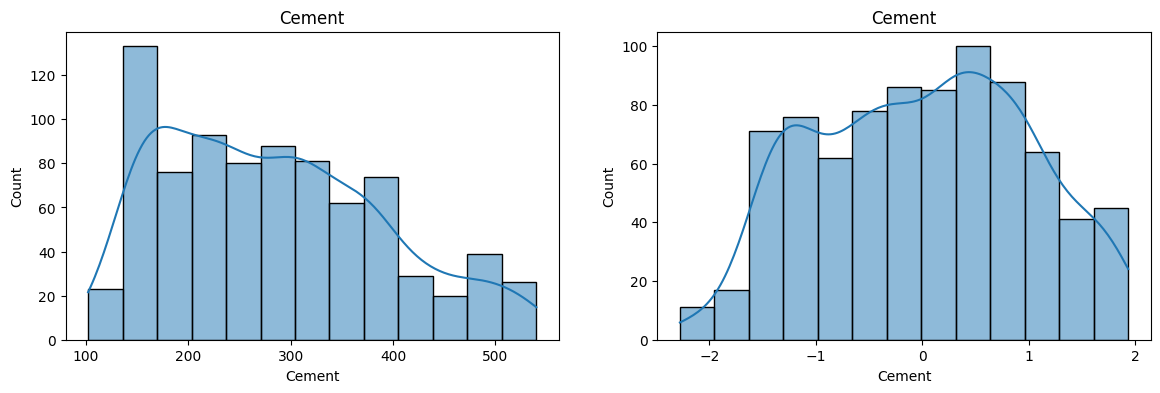

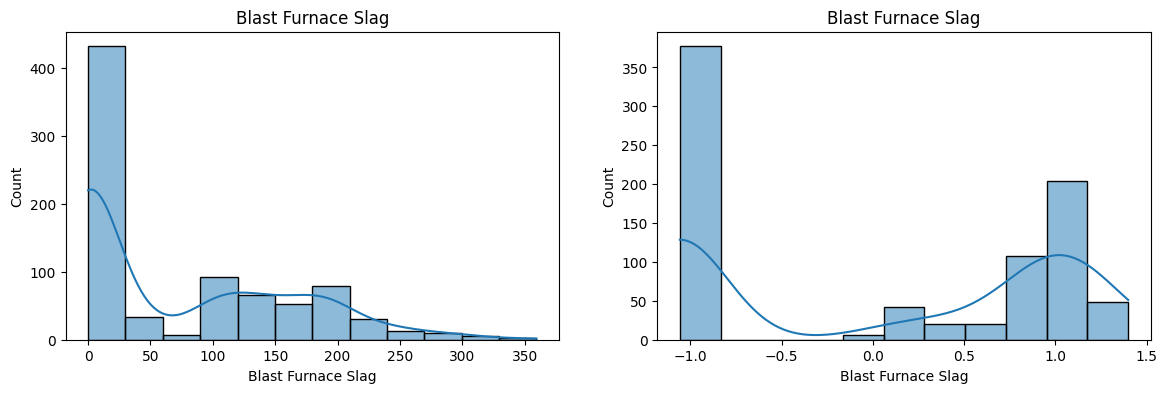

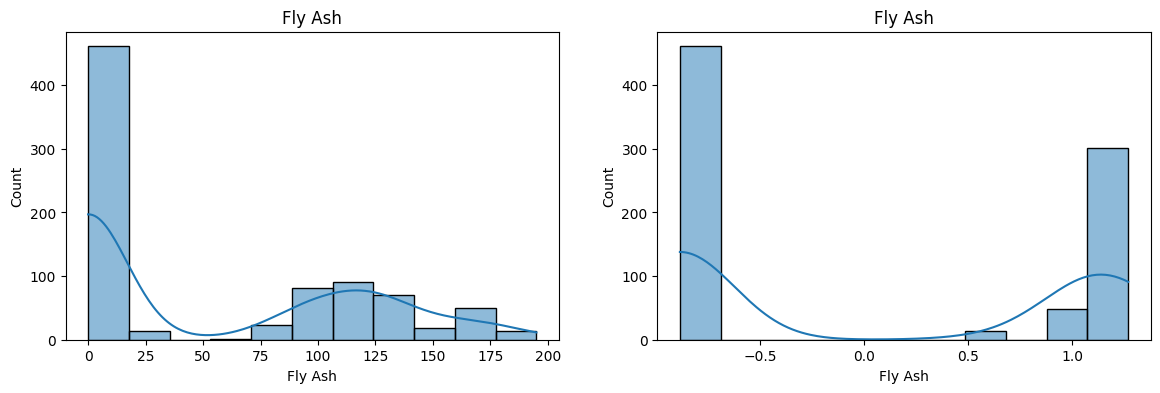

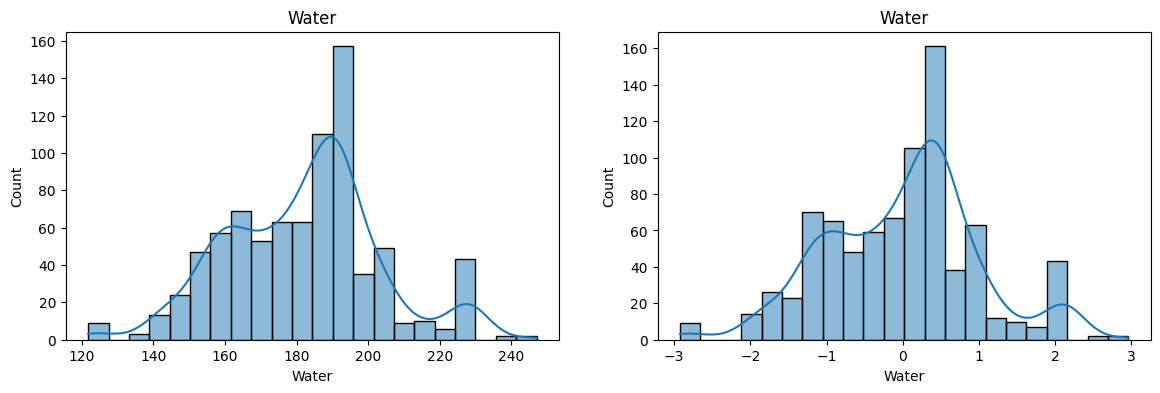

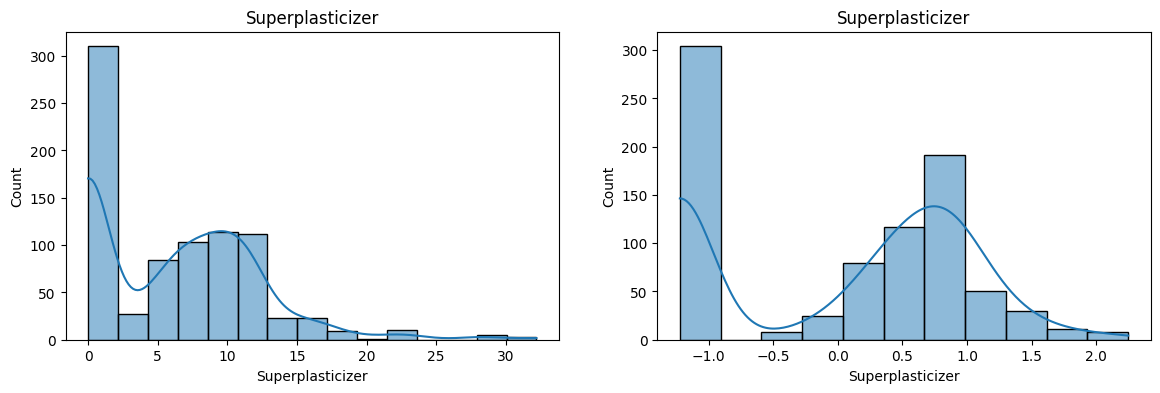

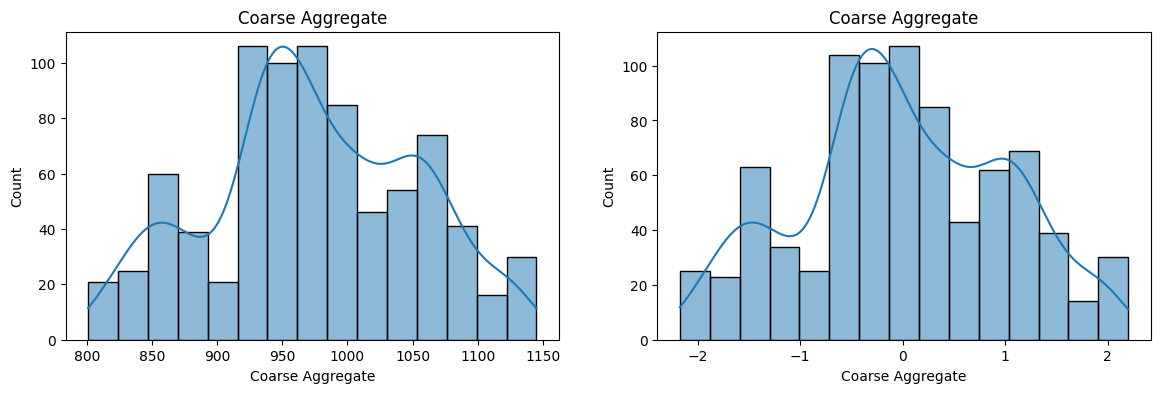

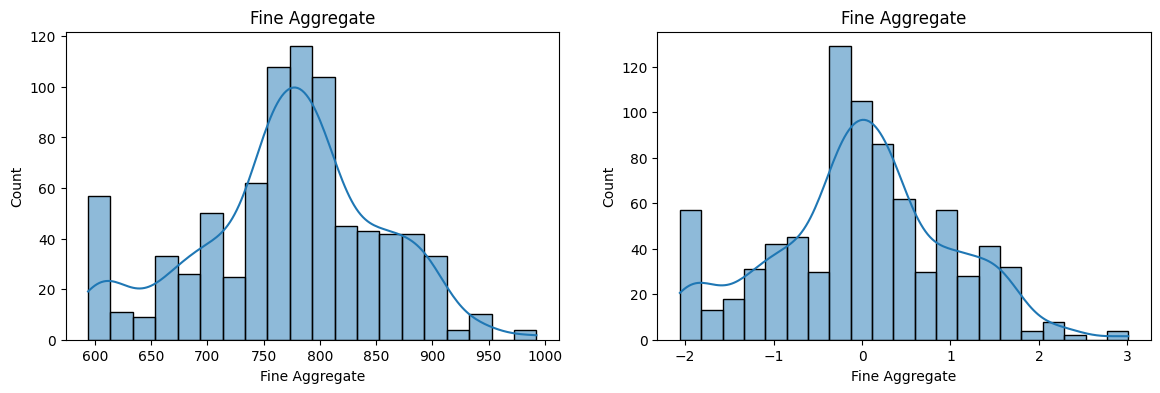

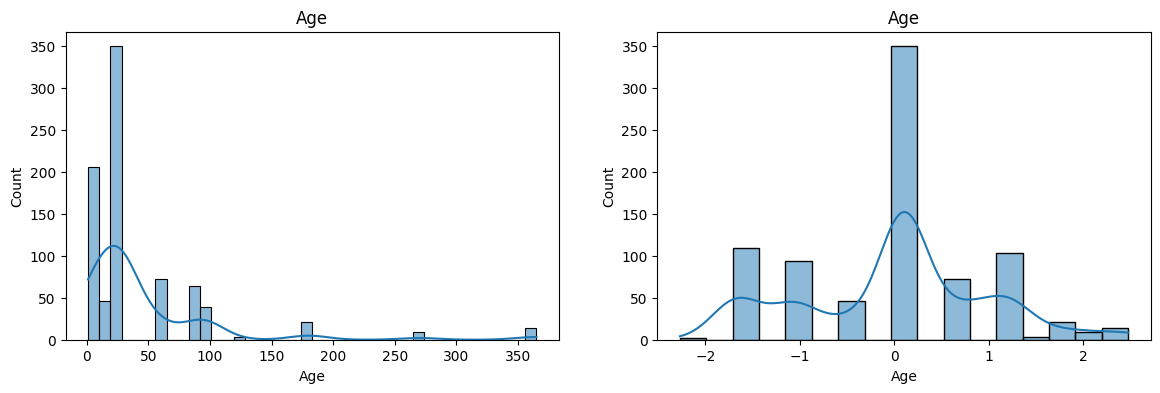

In [48]:
# Before and after comparision for Yeo-Johnson

X_train_transformed2.columns=X_train.columns
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)
    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)
    plt.show()

In [49]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
